In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


In [ ]:

df_imovel = pd.read_csv("/content/desafio_01_preco_imoveis.csv")

display(df_imovel.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


**Questão 1**

In [ ]:
#remoção da coluna id e date
df_corr = df_imovel.drop(columns=['date'])
df_corr.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


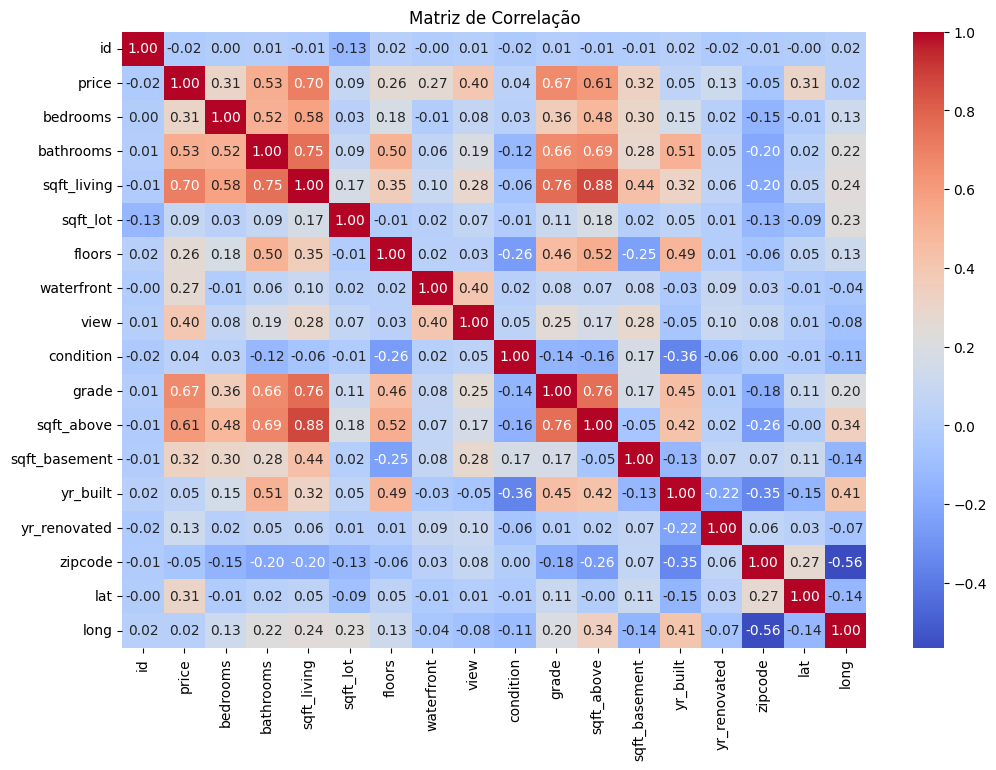

In [ ]:
mat_corr = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(mat_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Podemos observar que as variáveis mais correlacionadas com o preço do imóvel são tamanho do imovél, número de banheiros, nota do imóvel, tamanho da casa acima do solo (excluindo porão) e o número de quartos com vista.
As menos correlacionadas são: tamanho do lote / terreno, condição do imóvel, ano em que a casa foi construída, "CEP" do imóvel e longitude do imóvel.


**Questão 2**

In [ ]:
## 1)

# Top 5 variáveis mais correlacionadas com o preço
top_corr_var = df_corr.corr()['price'].sort_values(ascending=False).index[1:6]
top_corr_var

Index(['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view'], dtype='object')

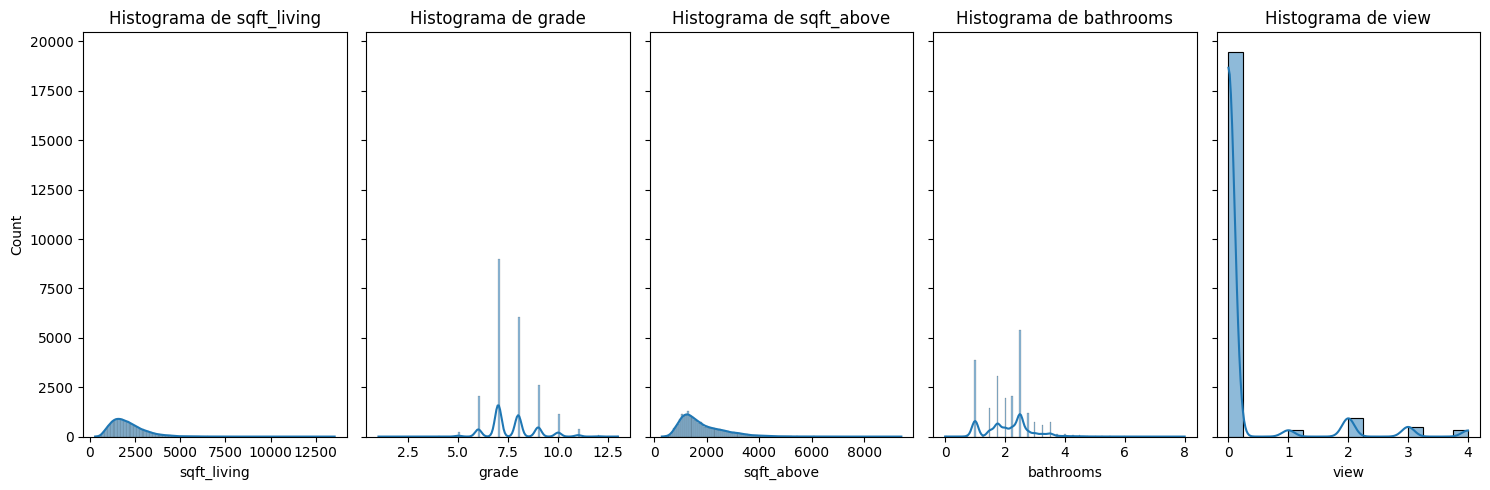

In [ ]:
#Histograma
fig, axes = plt.subplots(1, len(top_corr_var), figsize=(15, 5), sharey=True)

for i, var in enumerate(top_corr_var):
    sns.histplot(data=df_corr, x=var, ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

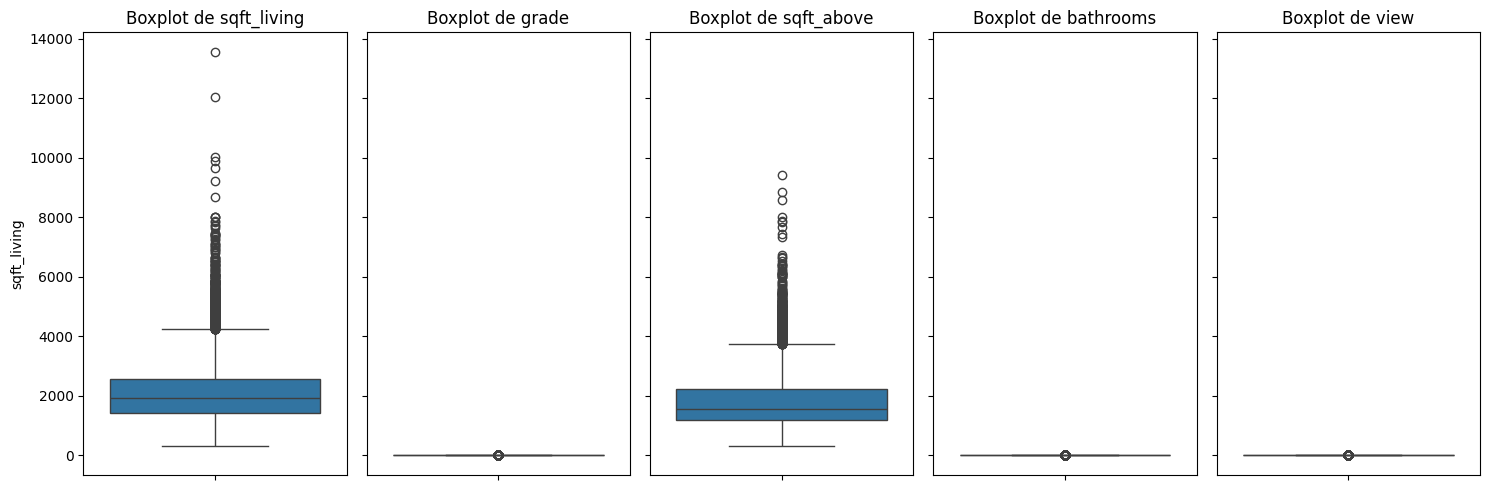

In [ ]:
#Boxplot
fig, axes = plt.subplots(1, len(top_corr_var), figsize=(15, 5), sharey=True)

for i, var in enumerate(top_corr_var):
    sns.boxplot(data=df_corr, y=var, ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

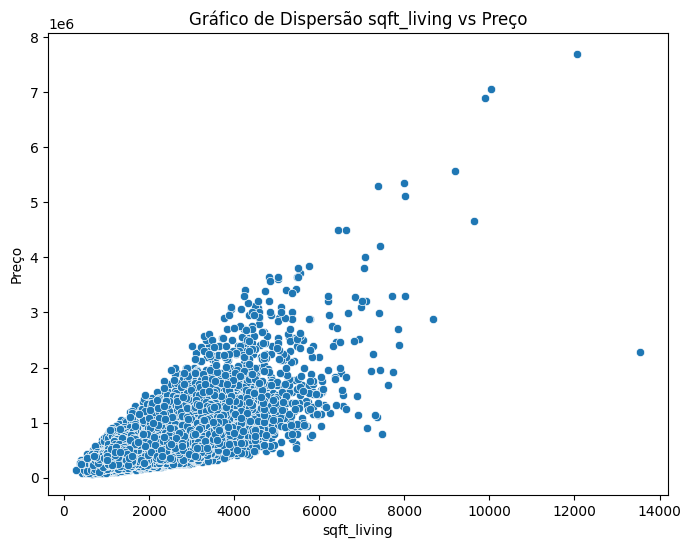

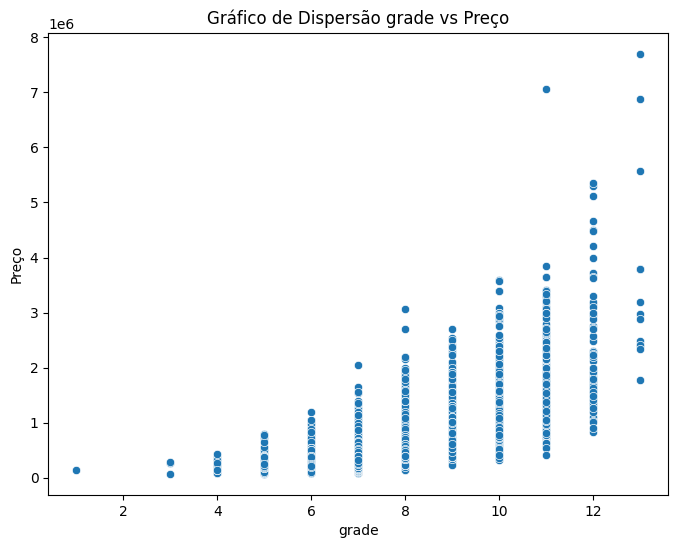

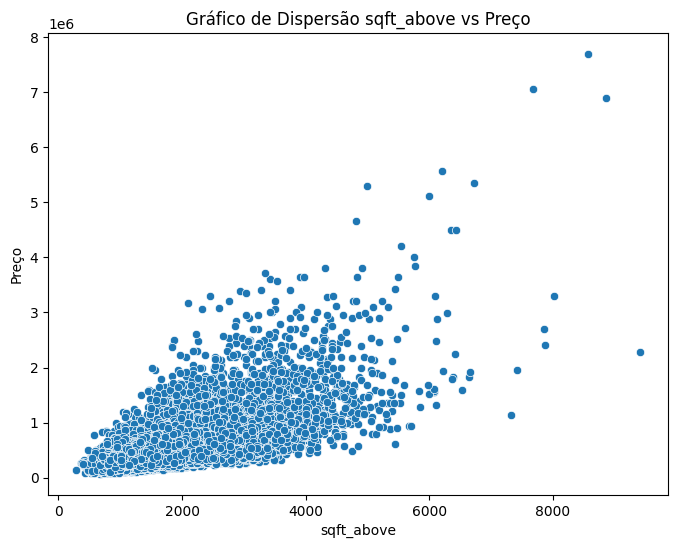

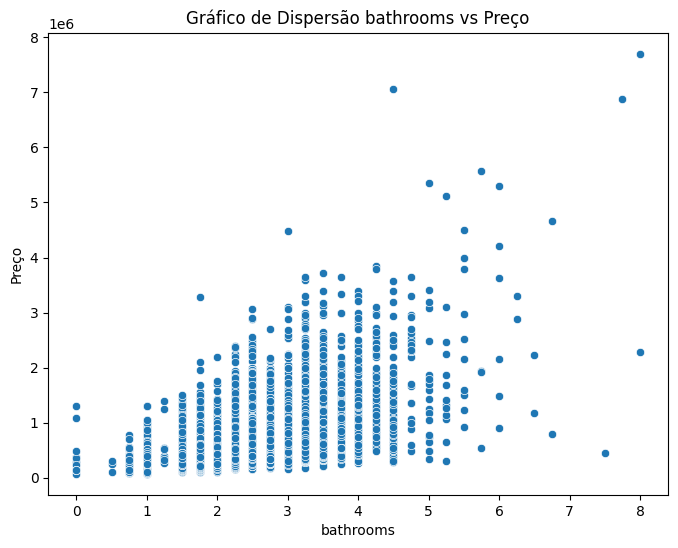

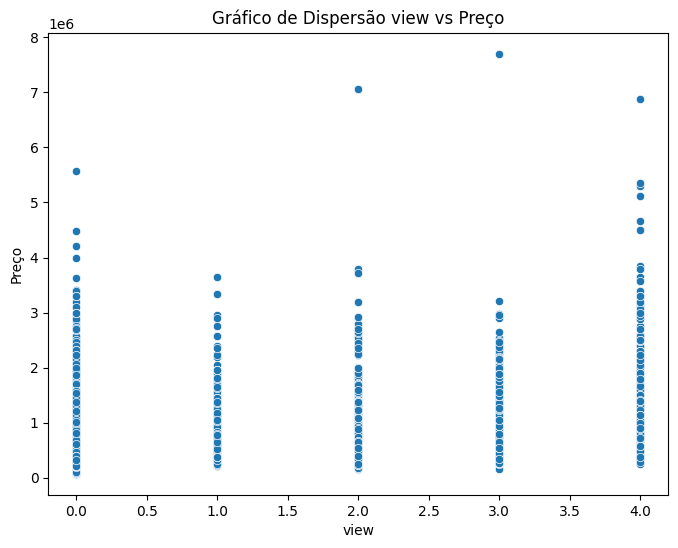

In [ ]:
##2

for column in top_corr_var:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_corr, x=column, y="price")
    plt.title(f'Gráfico de Dispersão {column} vs Preço')
    plt.ylabel("Preço")
    plt.xlabel(column)
    plt.show()
    print('\n')

In [ ]:
##3


for column in top_corr_var:

    X = sm.add_constant(df_corr[column])
    y = df_corr['price']

    model = sm.OLS(y, X).fit()
    print(f'Regressão Linear Simples para {column}')
    print(model.summary())
    print('\n')
    print('\n')


Regressão Linear Simples para sqft_living
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        23:37:37   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const   


O modelo de regressão linear simples para as variáveis sqft_living, grade, sqft_above, bathrooms e view apresentaram  coeficientes de determinação(R^2) de 0.49,0.45,0.37,0.28 e 0.16 respectivamente.
Os p-valores ficaram menores que 0.05 para todas as variáveis independentes com exceção da váriável bathrooms (p-valor de 0.085).

Portanto, podemos concluir que a variáveis independentes(sqft_living, grade, sqft_above e view) tem uma relação estatisticamente significativa com a variável dependente (preço), e o modelo de regressão linear é capaz de explicar uma parte significativa da variabilidade no preço com base nessas variáveis independentes.

Já para a variável independente(bathrooms) com  coeficiente de determinação de 0.28 e o valor p de 0.085 indica uma relação modesta com a variável dependente (preço), mas essa relação não é estatisticamente significativa ao nível de significância tradicional de 0.05. Devido ao valor p de 0.085, não podemos rejeitar a hipótese nula de que não há efeito significativo do número de banheiros sobre o preço. Portanto, embora a variável independente possa ter alguma influência na variável dependente, essa influência não é forte o suficiente para ser considerada estatisticamente significativa com base nos dados disponíveis e no nível de significância escolhido. Sugerindo que outros fatores ou variáveis podem estar contribuindo mais significativamente para explicar a variação no preço.

Um outro ponto que pode ser considerado, são os baixos valores do coeficiente de determinação(R^2) para as variáveis independentes  sqft_above, bathrooms e view, podendo ser considerados não muito bons. Mas, um baixo R^2 não necessariamente invalida o modelo, mas sugere que há espaço para melhorias na explicação da variabilidade na variável dependente.
